In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import trange
from matplotlib.pyplot import figure
import json
import pandas as pd

In [2]:
# load dataset, params, and results

# load model run to evaluate 
dir = "~/PhD/Intel-Neuromorphic-Research-Project/output/SC_shuffle_off_single_shuffle_on/"
if os.path.isfile(os.path.expanduser(dir + "hidden_spike_counts_unfiltered.npy")):
        hidden_spike_counts = np.load(os.path.expanduser(dir + "hidden_spike_counts_unfiltered.npy"))
        
output = pd.read_csv(os.path.expanduser(dir + "train_output.csv"))

with open(os.path.expanduser(dir + "params.json"), "r") as f:
        params = json.load(f)
        
# load dataset
x_train = np.load(os.path.expanduser(params.get("dataset_directory")) + "training_x_data.npy")
y_train = np.load(os.path.expanduser(params.get("dataset_directory")) + "training_y_data.npy")

# adding validation data if exists
validation_images = np.array([])
validation_labels = np.array([])
if os.path.isfile(os.path.expanduser(params.get("dataset_directory")) + "validation_y_data.npy"):
        print("!! validation dataset loaded successfully")
        x_validation = np.load(os.path.expanduser(params.get("dataset_directory")) + "validation_x_data.npy")
        y_validation = np.load(os.path.expanduser(params.get("dataset_directory")) + "validation_y_data.npy")

        validation_images = np.swapaxes(x_validation, 1, 2) 
        validation_images = validation_images + abs(np.floor(validation_images.min()))

        validation_labels = y_validation

!! validation dataset loaded successfully


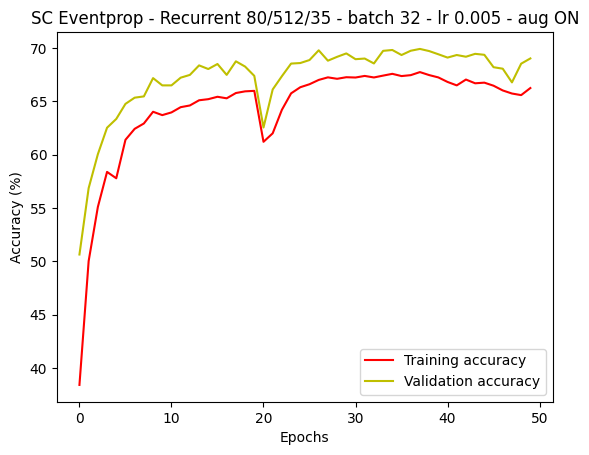

In [3]:
plt.plot((np.array(list(output.loc[:, "accuracy"])[0::2])) * 100, color = 'r', label = "Training accuracy")
plt.plot((np.array(list(output.loc[:, "accuracy"])[1::2])) * 100, color = 'y', label = "Validation accuracy")

plt.ylabel("Accuracy (%)")
plt.xlabel("Epochs")

plt.title("{} Eventprop - {} {}/{}/{} - batch {} - lr {} - aug {}".format(params.get("model_description"),
            "Recurrent" if params.get("recurrent") else "Feed Forward",
            params.get("NUM_INPUT"),
            params.get("NUM_HIDDEN"),
            params.get("NUM_OUTPUT"),
            params.get("BATCH_SIZE"),
            params.get("lr"),
            "ON" if params.get("recurrent") else "OFF"))

plt.legend()
plt.show()

()
0


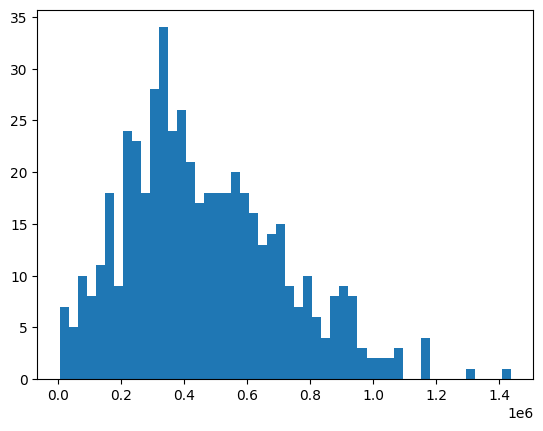

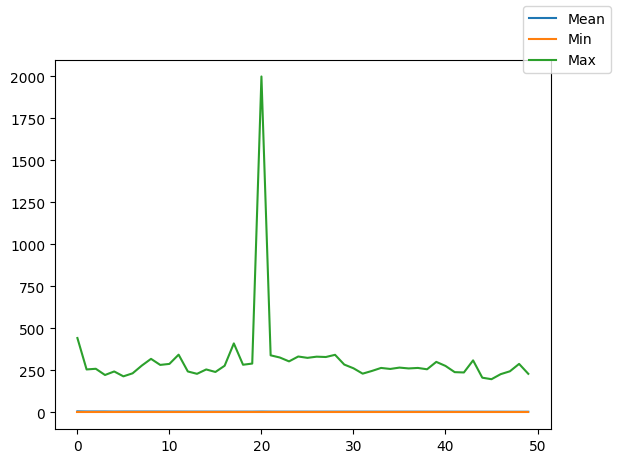

In [4]:
if os.path.isfile(os.path.expanduser(dir + "hidden_spike_counts_unfiltered.npy")):

    hidden_spike_counts = np.reshape(hidden_spike_counts, (params.get("NUM_EPOCH"), -1, params.get("NUM_HIDDEN")))
    hidden_spike_counts = hidden_spike_counts[:,:x_train.shape[0],:]

    means = np.average(hidden_spike_counts, axis=1)
    min = np.amin(hidden_spike_counts, axis=1)
    max = np.amax(hidden_spike_counts, axis=1)

    sums = np.sum(hidden_spike_counts,axis=1)
    plt.figure()
    plt.hist(sums[25,:],50)
    zeros = np.sum(sums == 0)
    print(zeros.shape)
    print(zeros)
    
    
    #print(means)
    x= np.allclose(means, 0)
    #print(np.sum(x))
    fig,axis=plt.subplots()
    mean_a = axis.plot(np.mean(means,axis=1))
    min_a = axis.plot(np.min(min,axis=1))
    max_a = axis.plot(np.max(max,axis= 1))
    #axis.set_ylim(0, np.max(means))
    fig.legend([mean_a[0], min_a[0], max_a[0]], ["Mean", "Min", "Max"])

In [5]:
a = np.array([1, 2, 3, 4, 5, 6])
b = np.array(["a", "b", "c", "d", "e", "f"])
shuffler = np.random.permutation(len(a))
a = a[shuffler]
b = b[shuffler]

print(a)
print(b)

[1 5 4 2 6 3]
['a' 'e' 'd' 'b' 'f' 'c']


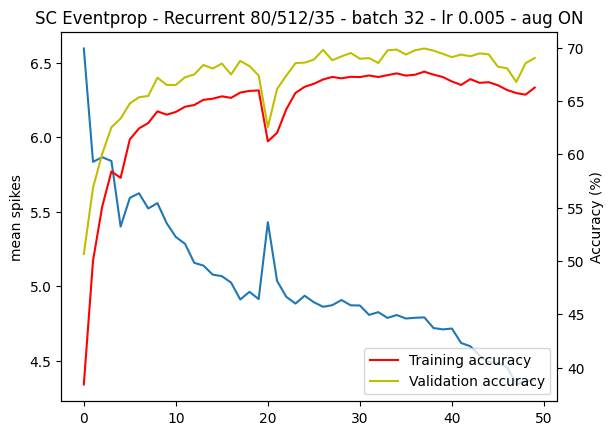

In [6]:
fig, ax1 = plt.subplots()

ax1.plot(np.mean(means,axis=1))

ax2 = ax1.twinx()

ax2.plot((np.array(list(output.loc[:, "accuracy"])[0::2])) * 100, color = 'r', label = "Training accuracy")
ax2.plot((np.array(list(output.loc[:, "accuracy"])[1::2])) * 100, color = 'y', label = "Validation accuracy")

ax2.set_ylabel("Accuracy (%)")
ax1.set_ylabel("mean spikes")
plt.xlabel("Epochs")

plt.title("{} Eventprop - {} {}/{}/{} - batch {} - lr {} - aug {}".format(params.get("model_description"),
            "Recurrent" if params.get("recurrent") else "Feed Forward",
            params.get("NUM_INPUT"),
            params.get("NUM_HIDDEN"),
            params.get("NUM_OUTPUT"),
            params.get("BATCH_SIZE"),
            params.get("lr"),
            "ON" if params.get("recurrent") else "OFF"))

plt.legend()
plt.show()


NameError: name 'sum_over_epoch' is not defined

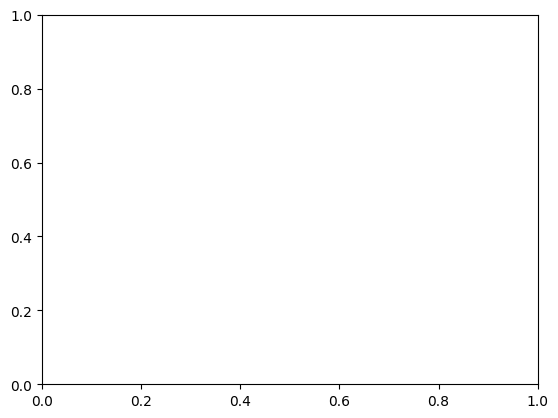

In [7]:
fig, ax1 = plt.subplots()

ax1.plot(sum_over_epoch[0::2], label = "average hidden layer spikes per training epoch")
ax1.plot(sum_over_epoch[1::2], label = "average hidden layer spikes per validation epoch")

ax2 = ax1.twinx()

ax2.plot(list(output.loc[:, "accuracy"])[0::2], color = 'r', label = "training acc")
ax2.plot(list(output.loc[:, "accuracy"])[1::2], color = 'y', label = "validation acc")
ax2.set_ylim(0, 1)

fig.tight_layout()
plt.title("FF - 40/256/20 - reg on - recurrent off")
plt.legend()
plt.show()